In [79]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
import os
print(os.getcwd())

/Users/evaschwartz/OneDrive - The George Washington University/data for capstone/data


In [81]:
print(os.listdir())

['TESTING DATA -- WESAD', '.DS_Store', 'TRAINING DATA -- non-eeg-dataset-for-assessment-of-neurological-status-1.0.0', 'testing.ipynb']


In [82]:
file_path = '/Users/evaschwartz/OneDrive - The George Washington University/data for capstone/data/TRAINING DATA -- non-eeg-dataset-for-assessment-of-neurological-status-1.0.0/Subject1_AccTempEDA'

In [83]:
record = wfdb.rdrecord(file_path, sampfrom=0,sampto=None)

signals = record.p_signal
raw_signals = record.d_signal
signal_names = record.sig_name

annotations = wfdb.rdann(file_path, 'atr')

In [84]:
print(df_EDATEMPACC.shape)
# 18,343 ticks, with 8 ticks per second
# 2,292.875 seconds
# 38.21 minutes 


(18343, 5)


In [85]:
df_EDATEMPACC = pd.DataFrame(data=signals, columns=record.sig_name)
print(df_EDATEMPACC.head())


         ax       ay        az       temp       EDA
0  0.760015 -0.86999 -0.100004  30.100043  0.083039
1  0.770025 -0.86999 -0.110031  30.100043  0.081028
2  0.750005 -0.86999 -0.100004  30.100043  0.081028
3  0.770025 -0.86999 -0.100004  30.100043  0.079018
4  0.750005 -0.86999 -0.100004  30.100043  0.081028


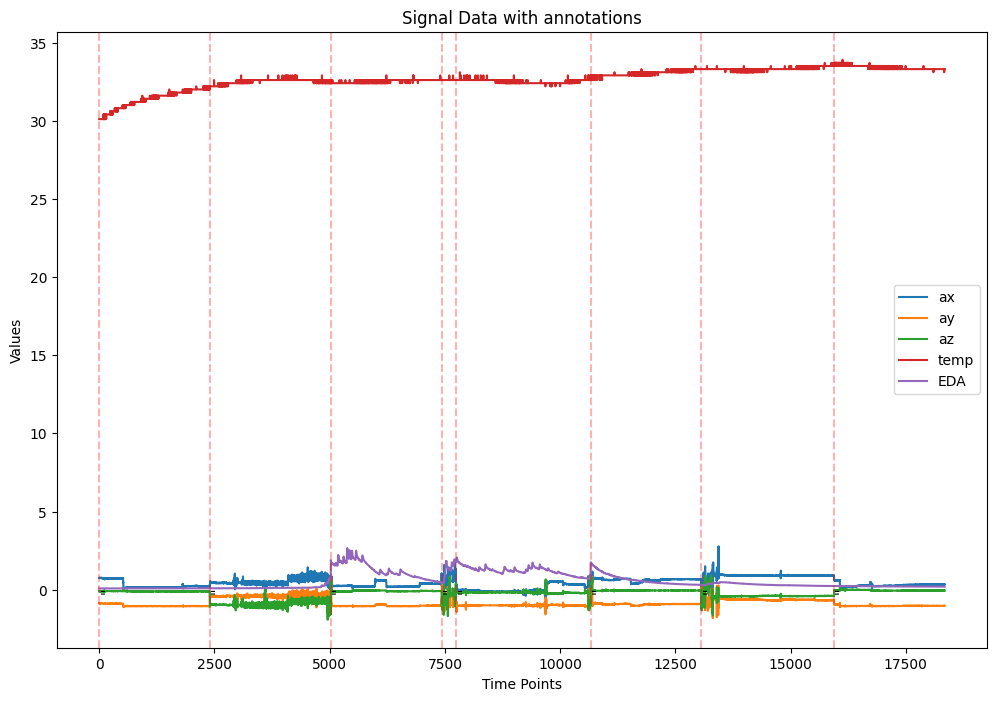

In [86]:
plt.figure(figsize=(12, 8))
for column in df_EDATEMPACC.columns:
    plt.plot(df_EDATEMPACC[column], label=column)

for sample, symbol in zip(annotations.sample, annotations.symbol):
    plt.axvline(x=sample, color='r', linestyle='--', alpha=.3)
    plt.text(sample, 0, symbol, rotation=90, verticalalignment='center')
plt.legend()
plt.title('Signal Data with annotations')
plt.xlabel('Time Points')
plt.ylabel('Values')
plt.show()


In [87]:
df_EDATEMPACC['time'] = pd.Series(range(len(df_EDATEMPACC))) / record.fs  # Time in seconds

In [88]:
sp_file_name = '/Users/evaschwartz/OneDrive - The George Washington University/data for capstone/data/TRAINING DATA -- non-eeg-dataset-for-assessment-of-neurological-status-1.0.0/Subject1_SpO2HR'

sp_record = wfdb.rdrecord(sp_file_name, sampfrom=0,sampto=None)

spsignals = sp_record.p_signal
spraw_signals = sp_record.d_signal
spsignal_names = sp_record.sig_name

annotations = wfdb.rdann(file_path, 'atr')

In [89]:
df_SP02HR= pd.DataFrame(data=spsignals, columns=spsignal_names)
df_SP02HR['time'] = pd.Series(range(len(df_SP02HR)))  # Time in seconds
print(df_SP02HR.head())

# this data is in different time units -- to convert to time units of other data, multiply each record by 8? 
# stretches out the time axis, maintains the data integrity? 

        SpO2         hr  time
0  96.999969  89.000763     0
1  96.999969  88.000137     1
2  96.999969  87.000443     2
3  96.999969  87.000443     3
4  96.999969  87.000443     4


In [90]:
df_SP02HR.drop(columns=['time'], inplace=True)


In [91]:
print(df_SP02HR.shape)
# 2299 ticks with 1 tick per second
# 38.2 minutes

(2299, 2)


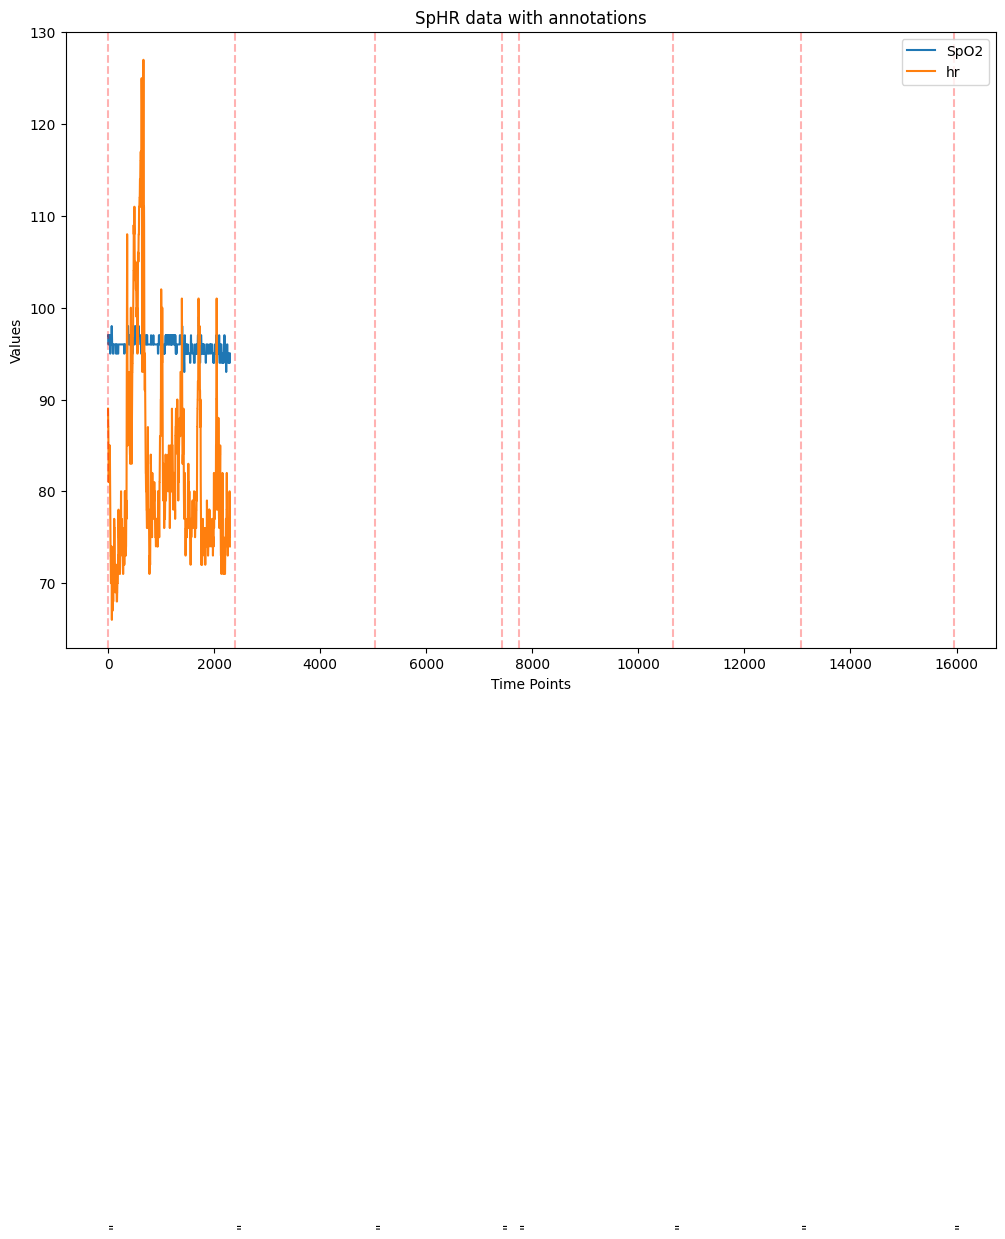

In [93]:
plt.figure(figsize=(12, 8))
for column in df_SP02HR.columns:
    plt.plot(df_SP02HR[column], label=column)

for sample, symbol in zip(annotations.sample, annotations.symbol):
    plt.axvline(x=sample, color='r', linestyle='--', alpha=.3)
    plt.text(sample, 0, symbol, rotation=90, verticalalignment='center')
plt.legend()
plt.title('SpHR data with annotations')
plt.xlabel('Time Points')
plt.ylabel('Values')
plt.show()